# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** laela Putri Salsa Biella
- **Email:** m010d4kx1507@bangkit.academy
- **ID Dicoding:** laela_putri_salsa_biella_m010d4kx1507_FASf

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apakah cuaca memengaruhi jumlah rental sepeda? Apakah ada perbedaan jumlah rental yang signifikan berdasarkan cuaca?

- Pertanyaan 2: Bagaimana perbandingan perilaku perental casual dengan pengguna registered dalam hal perilaku penyewaan sepeda?

- Pertanyaan 3: Does the occurrence of holidays (holiday) influence bike rental demand?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

## Data Wrangling

### Gathering Data

In [4]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
day_df = pd.read_csv("/content/day.csv")
day_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


### Assessing Data

### Assesing data day_df

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Mengubah tipe data kolom 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Memastikan perubahan telah dilakukan dengan benar
print(day_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


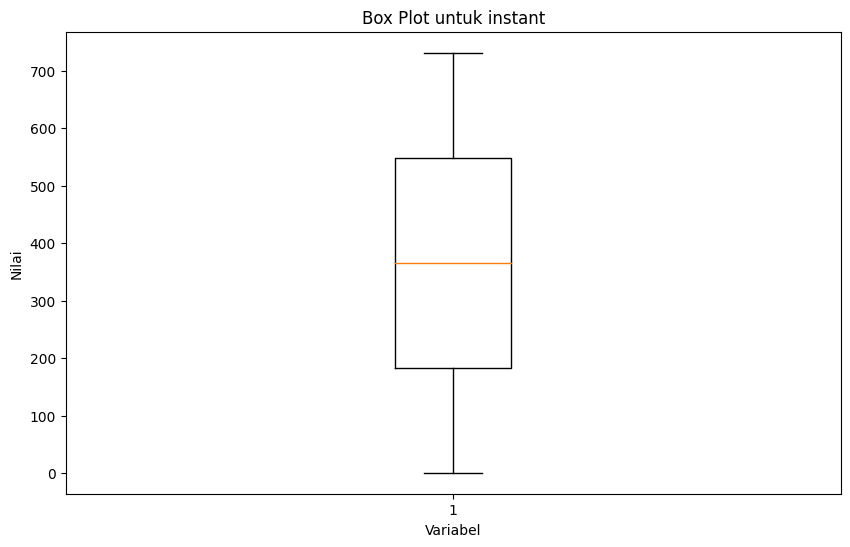

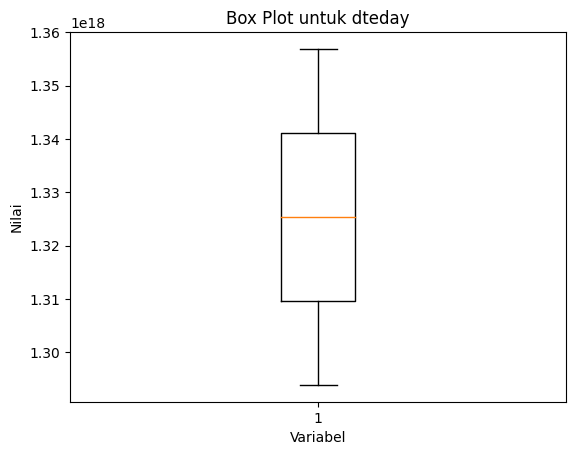

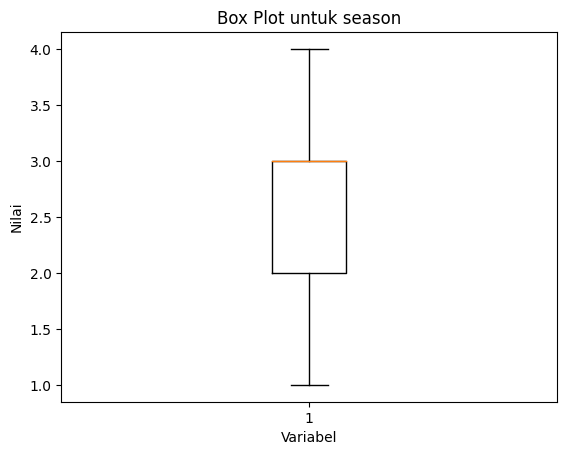

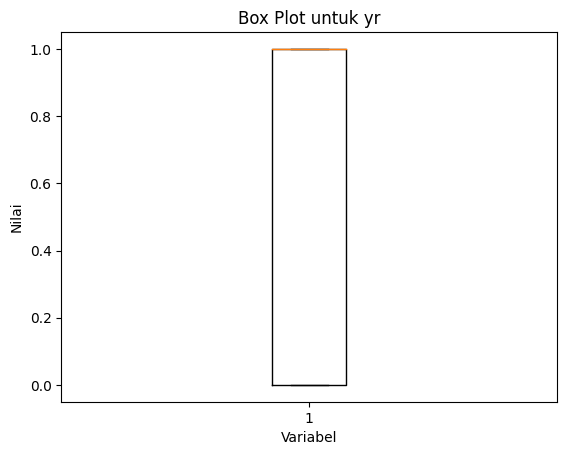

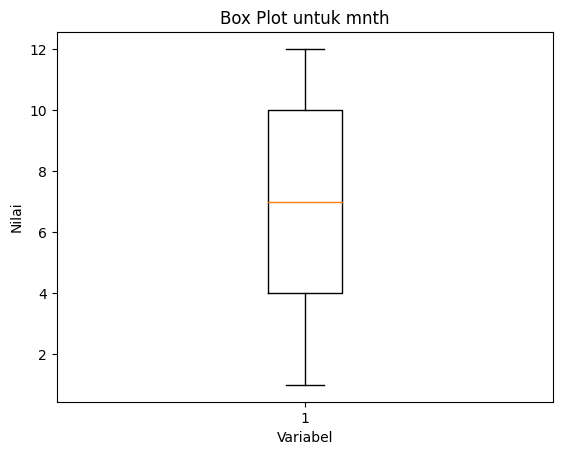

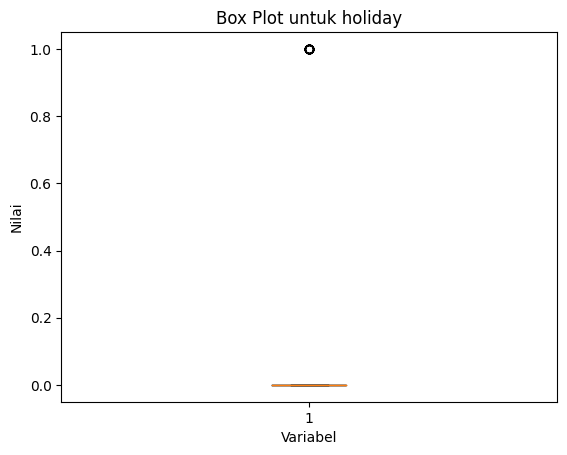

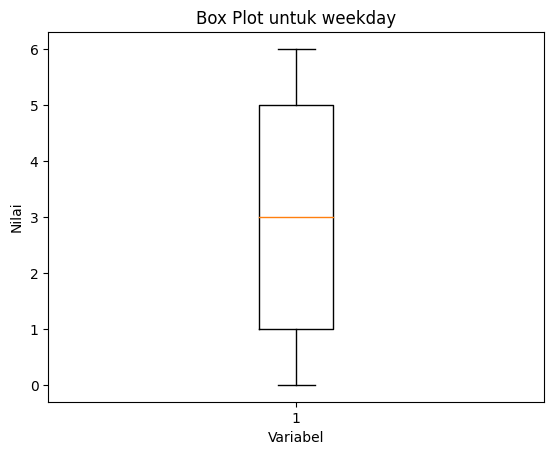

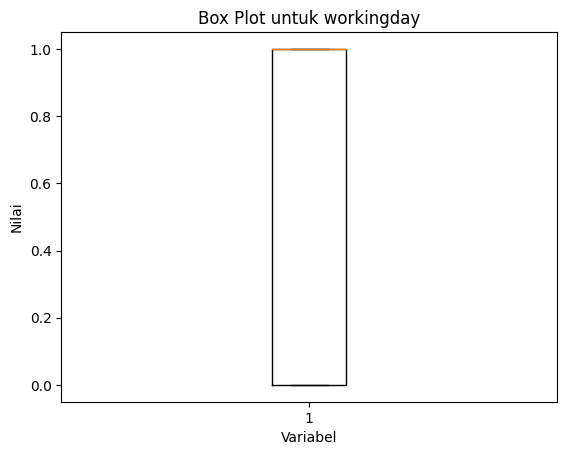

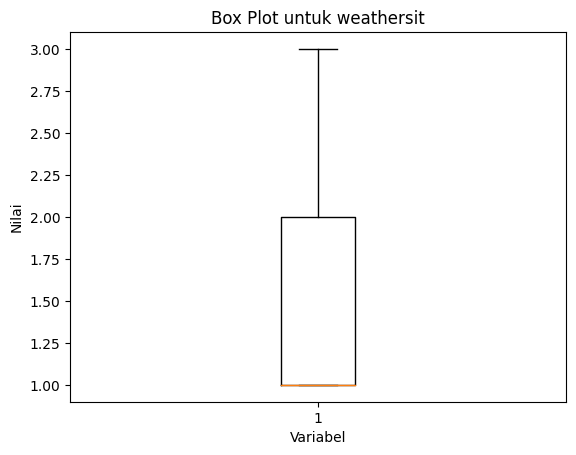

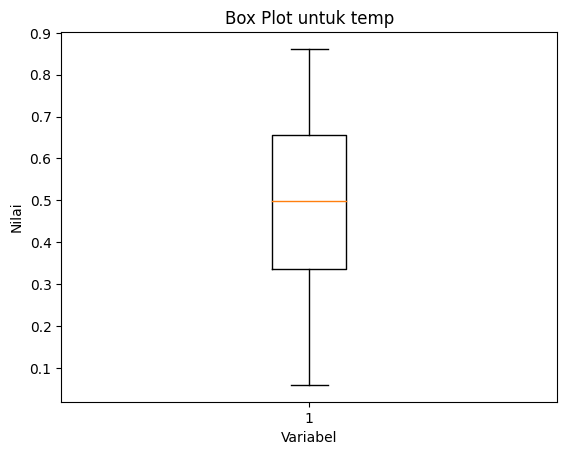

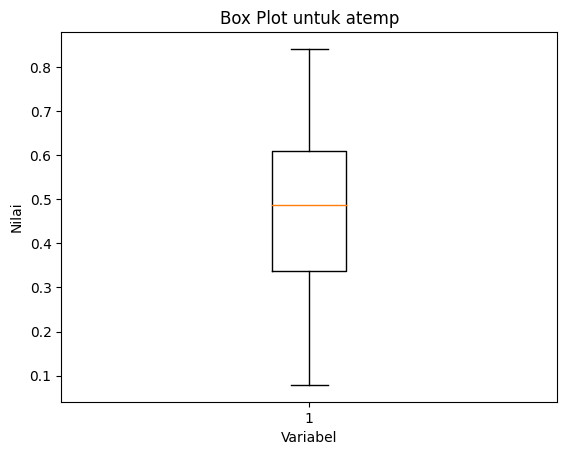

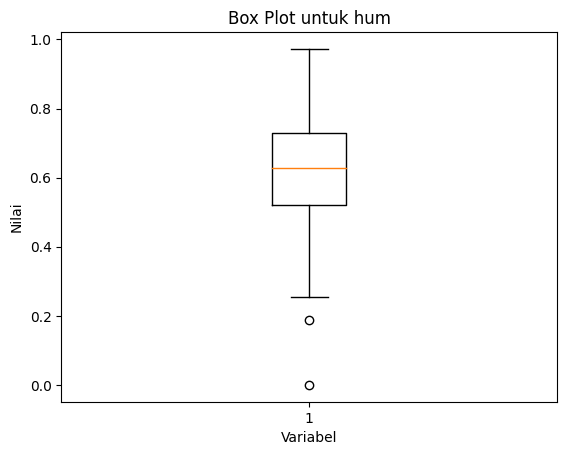

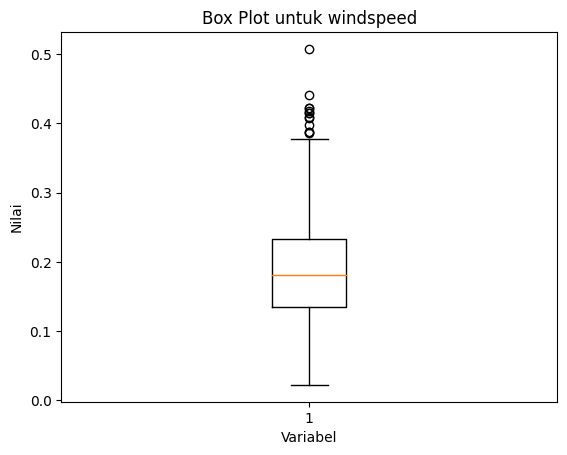

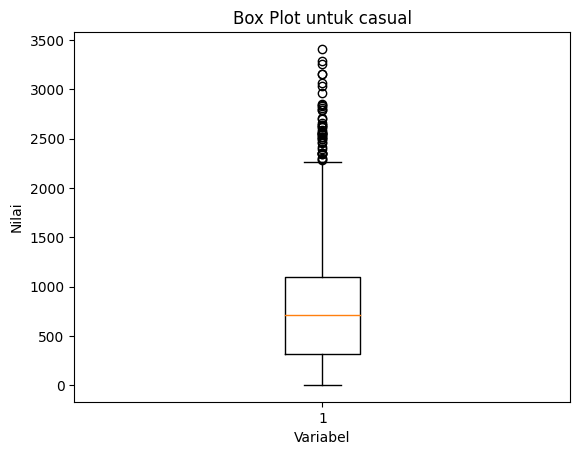

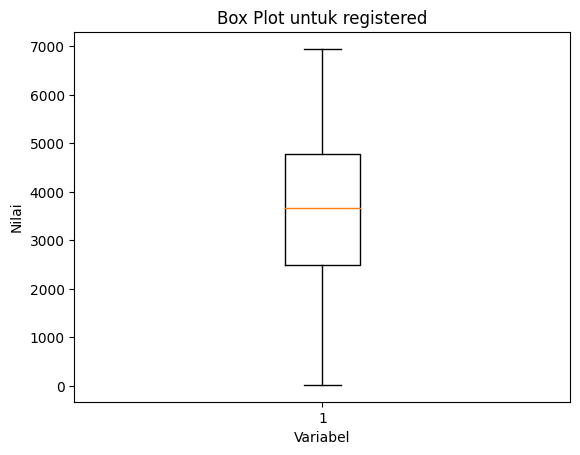

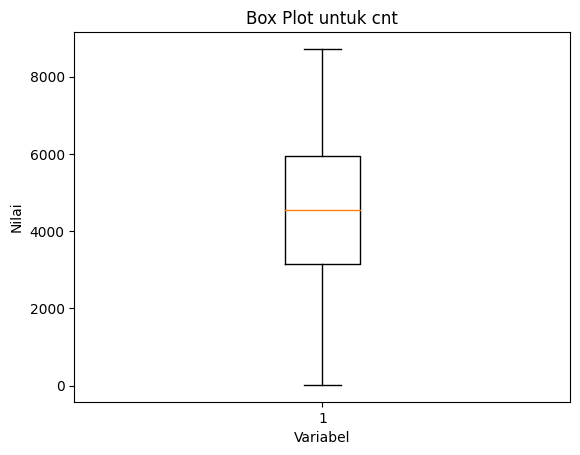

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
# Misalkan day_df adalah DataFrame Anda

# Membuat salinan DataFrame untuk memastikan bahwa perubahan tidak mempengaruhi DataFrame asli
day_df_copy = day_df.copy()

# Konversi kolom datetime menjadi tipe data numerik (timestamp)
day_df_copy['dteday'] = day_df_copy['dteday'].astype('int64')

# Mengatur ukuran plot
plt.figure(figsize=(10, 6))

# Iterasi melalui setiap kolom (variabel)
for column in day_df_copy.columns:
    # Membuat box plot untuk kolom saat ini
    plt.boxplot(day_df_copy[column])

    # Menambahkan judul dan label sumbu
    plt.title(f"Box Plot untuk {column}")
    plt.xlabel("Variabel")
    plt.ylabel("Nilai")

    # Menampilkan plot
    plt.show()


----

### Assesing data hour_df

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
# Mengubah tipe data kolom 'dteday' menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Memastikan perubahan telah dilakukan dengan benar
print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


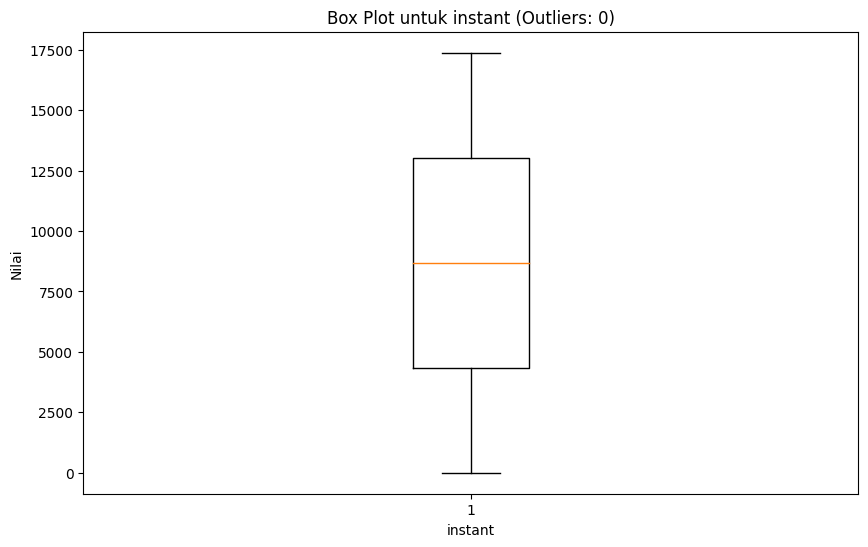

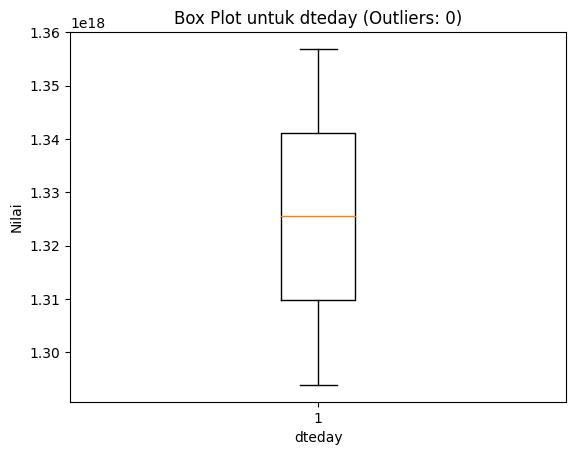

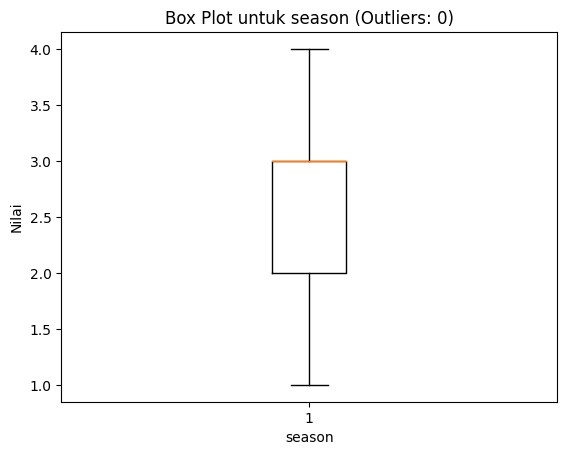

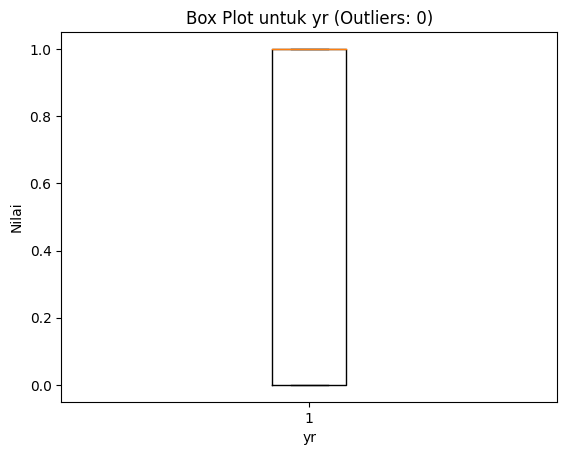

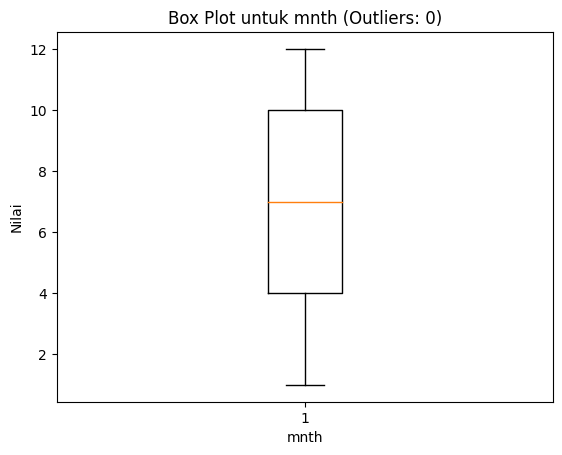

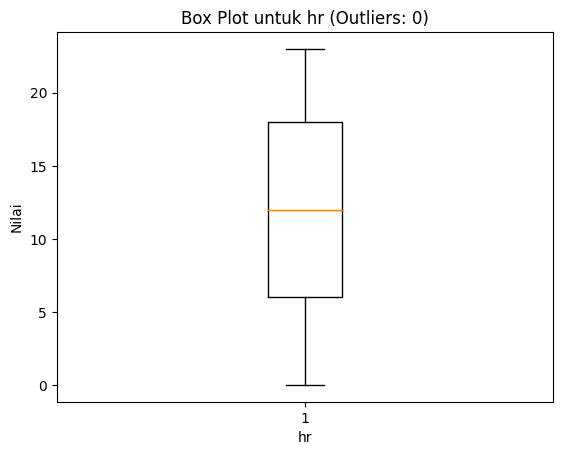

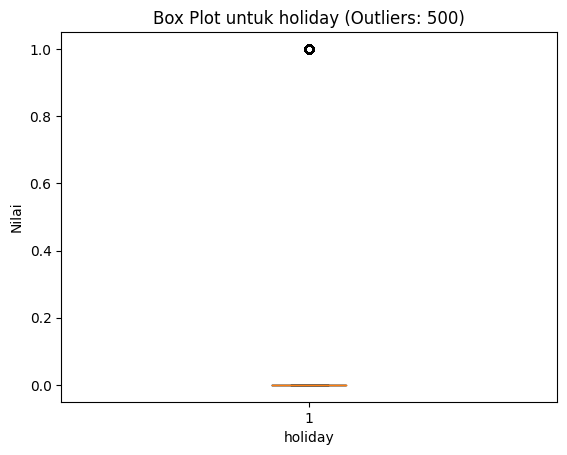

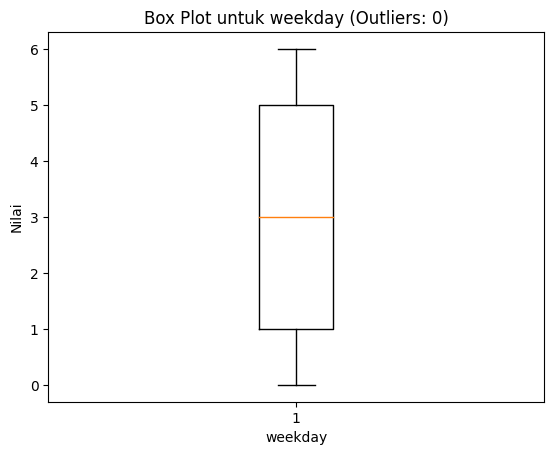

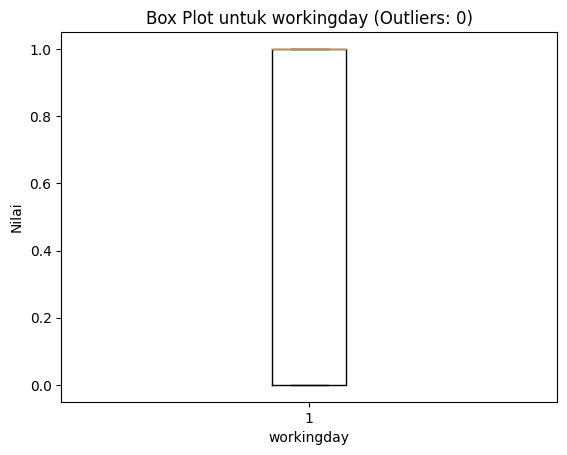

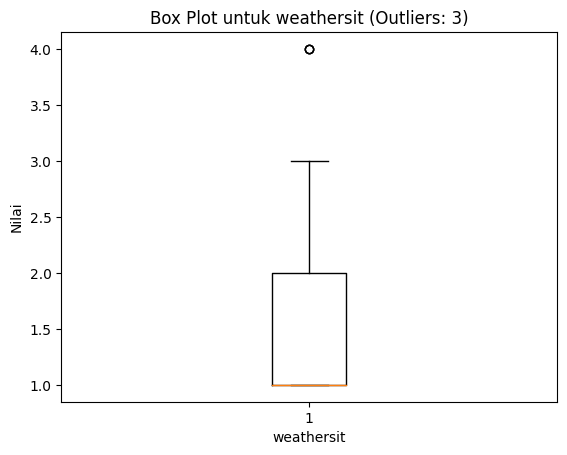

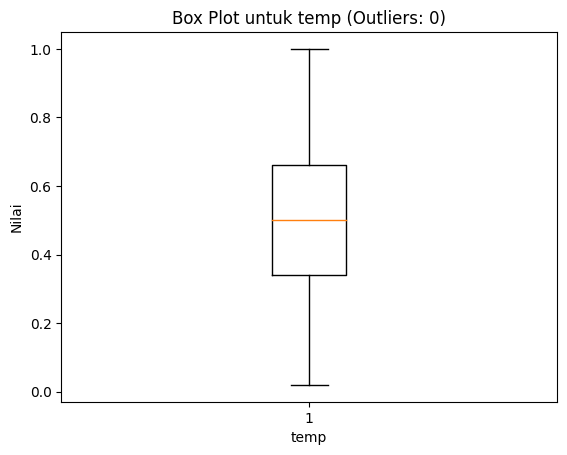

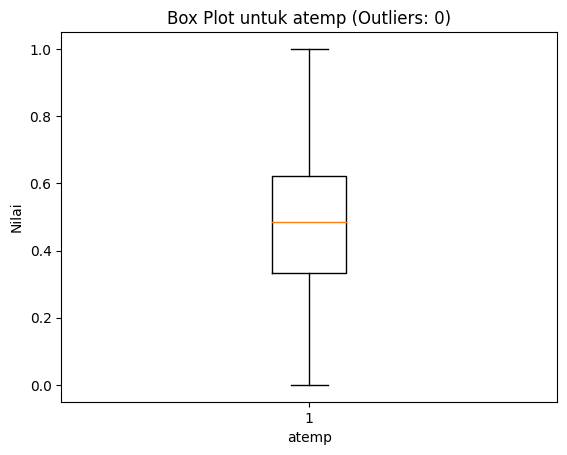

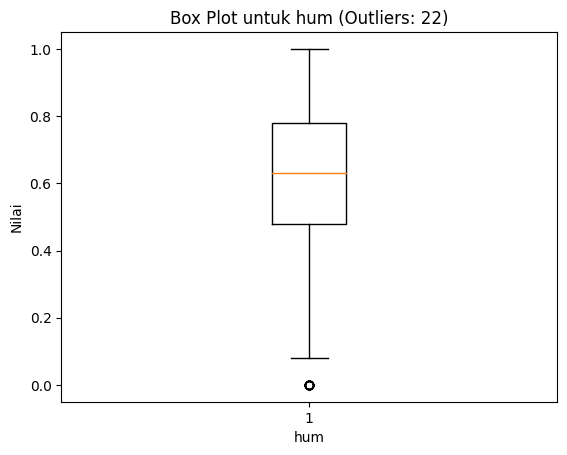

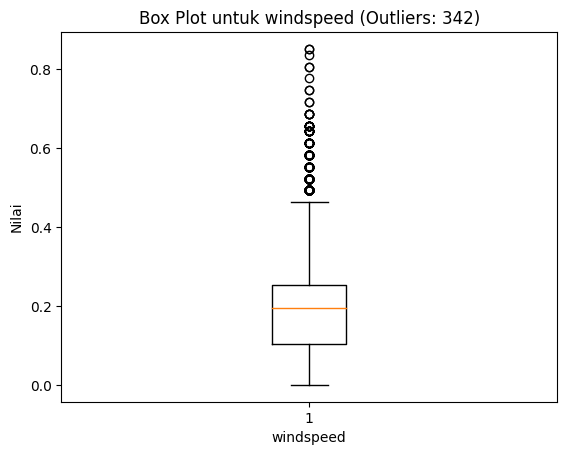

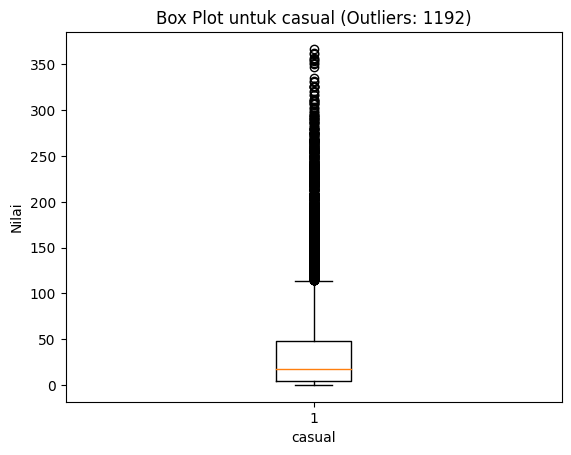

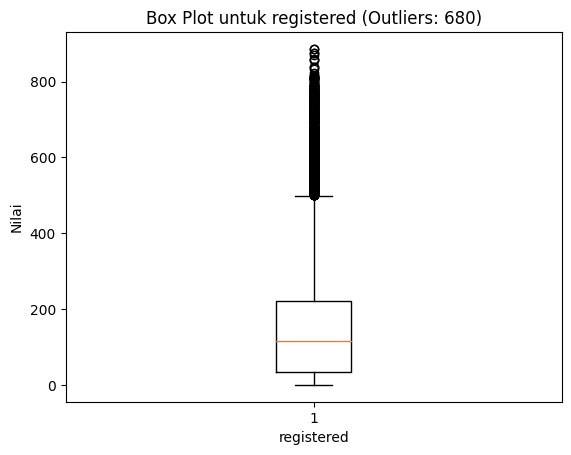

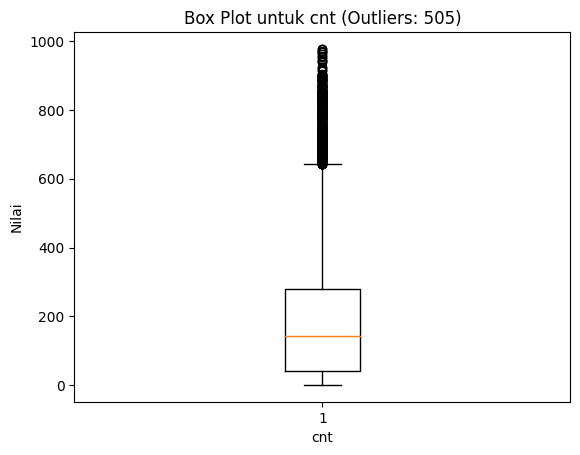

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
# Misalkan hour_df adalah DataFrame Anda

# Membuat salinan DataFrame untuk memastikan bahwa perubahan tidak mempengaruhi DataFrame asli
hour_df_copy = hour_df.copy()

# Konversi kolom datetime menjadi tipe data numerik (timestamp)
hour_df_copy['dteday'] = hour_df_copy['dteday'].astype('int64')

# Mengatur ukuran plot
plt.figure(figsize=(10, 6))

# Iterasi melalui setiap kolom (variabel)
for column in hour_df_copy.columns:
    # Menghitung jumlah outlier
    Q1 = hour_df_copy[column].quantile(0.25)
    Q3 = hour_df_copy[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = ((hour_df_copy[column] < lower_bound) | (hour_df_copy[column] > upper_bound)).sum()

    # Membuat box plot untuk kolom saat ini
    plt.boxplot(hour_df_copy[column])

    # Menambahkan judul dan label sumbu
    plt.title(f"Box Plot untuk {column} (Outliers: {outliers_count})")
    plt.xlabel(f"{column}")
    plt.ylabel("Nilai")

    # Menampilkan plot
    plt.show()


Berikut merupakan daftar variabel yang memiliki outlier serta insight yang bisa didapatkan darinya.
1. holiday : outlier karena data sebenarnya boolean, sehingga data minoritasnya terhitung sebagai outlier.
2. weathersit : value 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog, terhitung sebagai outlier karena sangat jarang ada yang meminjam sepeda di cuaca ekstrem seperti value no 4.
3. hum : outlier hum semuanya berada di nilai 0%, nilai tersebut tidak mungkin bisa terjadi di dunia nyata. Hal ini merupakan error saat pencatatan data. Tidak ada bangak insight dari data outlier ini.
4. windspeed, casual, cnt : tidak ada makna atau insight yang berarti.

dari daftar tersebut yang perlu di-handle adalah nomor 3.

Hasil dari data wraggling, ternyata hour_df dan day_df memiliki data yang sama dan hour_df memiliki data yang lebih lengkap karena teragregasi berdasarkan jam. Oleh karena itu, pada proses selanjutnya saya hanya akan menggunakan dataset hour_df.

### Cleaning Data

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Dari output di atas, dapat dilihat bahwa kolom dteday sudah dalam bentuk tipe data datetime sehingga kolom yr dan mnth yang merepresentasikan tahun dan bulan sudah tidak diperlukan lagi karena redundan dengan dteday yang sudah mencakup hari, bulan, dan tahun.

In [17]:
# drop kolom yr dan mnth
hour_df = hour_df.drop(['yr','mnth'], axis=1)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   hr          17379 non-null  int64         
 4   holiday     17379 non-null  int64         
 5   weekday     17379 non-null  int64         
 6   workingday  17379 non-null  int64         
 7   weathersit  17379 non-null  int64         
 8   temp        17379 non-null  float64       
 9   atemp       17379 non-null  float64       
 10  hum         17379 non-null  float64       
 11  windspeed   17379 non-null  float64       
 12  casual      17379 non-null  int64         
 13  registered  17379 non-null  int64         
 14  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 2.0 MB


In [18]:
# drop outlier kolom hum
Q1 = (hour_df['hum']).quantile(0.25)
Q3 = (hour_df['hum']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = hour_df['hum'] < minimum
kondisi_more_than = hour_df['hum'] > maximum

hour_df.drop(hour_df[kondisi_lower_than].index, inplace=True)
hour_df.drop(hour_df[kondisi_more_than].index, inplace=True)

<ipython-input-18-62134c950d3e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hour_df.drop(hour_df[kondisi_more_than].index, inplace=True)


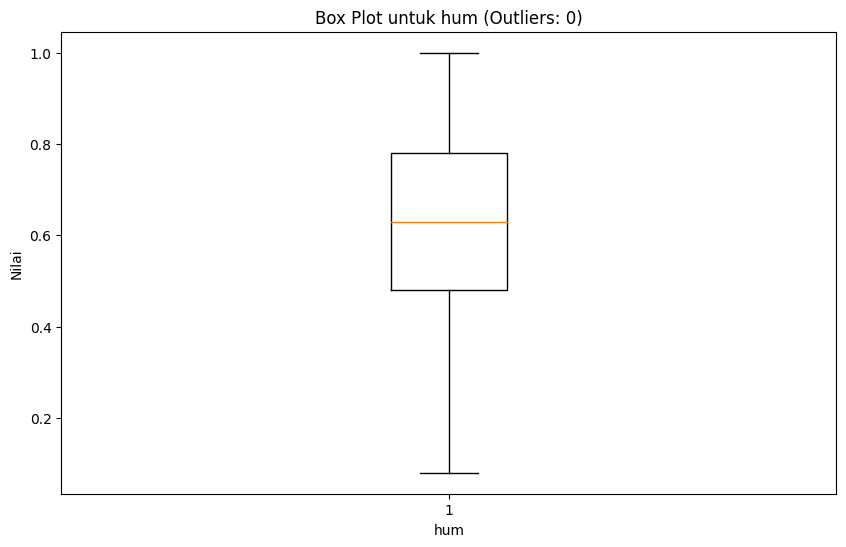

In [19]:
# Mengatur ukuran plot
plt.figure(figsize=(10, 6))


# Menghitung jumlah outlier
Q1 = hour_df['hum'].quantile(0.25)
Q3 = hour_df['hum'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_count = ((hour_df['hum'] < lower_bound) | (hour_df['hum'] > upper_bound)).sum()

# Membuat box plot untuk kolom saat ini
plt.boxplot(hour_df['hum'])

# Menambahkan judul dan label sumbu
plt.title(f"Box Plot untuk hum (Outliers: {outliers_count})")
plt.xlabel(f"hum")
plt.ylabel("Nilai")

# Menampilkan plot
plt.show()

## Exploratory Data Analysis (EDA)

### Explore
- Pertanyaan 1: Apakah cuaca memengaruhi jumlah rental sepeda? Apakah ada perbedaan jumlah rental yang signifikan berdasarkan cuaca?

- Pertanyaan 2: Bagaimana perbandingan perilaku perental casual dengan pengguna registered dalam hal perilaku penyewaan sepeda?

- Pertanyaan 3: Does the occurrence of holidays (holiday) influence bike rental demand?

In [20]:
weather_effect = hour_df.groupby('weathersit').agg({
    'cnt': 'mean'
}).reset_index()

weather_effect.columns = ['Kondisi Cuaca', 'Rata-rata Jumlah Rental Sepeda']
weather_effect


,Kondisi Cuaca,Rata-rata Jumlah Rental Sepeda
0,1,204.869272
1,2,175.210700
2,3,112.832738
3,4,74.333333


In [21]:
user_comparison = hour_df[['casual', 'registered']].mean().reset_index()
user_comparison.columns = ['Tipe Pengguna', 'Rata-rata Jumlah Penyewaan']
user_comparison['Tipe Pengguna'] = ['Casual', 'Registered']
user_comparison


,Tipe Pengguna,Rata-rata Jumlah Penyewaan
0,Casual,35.718788
1,Registered,153.948551


In [22]:
holiday_effect = hour_df.groupby('holiday')['cnt'].mean().reset_index()
holiday_effect.columns = ['Hari Libur', 'Rata-rata Jumlah Penyewaan']
holiday_effect['Hari Libur'] = ['Bukan Hari Libur', 'Hari Libur']
holiday_effect

,Hari Libur,Rata-rata Jumlah Penyewaan
0,Bukan Hari Libur,190.640149
1,Hari Libur,156.870000


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah cuaca memengaruhi jumlah rental sepeda? Apakah ada perbedaan jumlah rental yang signifikan berdasarkan cuaca?

<ipython-input-23-ff5ccdfbfd7c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_effect, x='Kondisi Cuaca', y='Rata-rata Jumlah Rental Sepeda',palette='Blues_r')


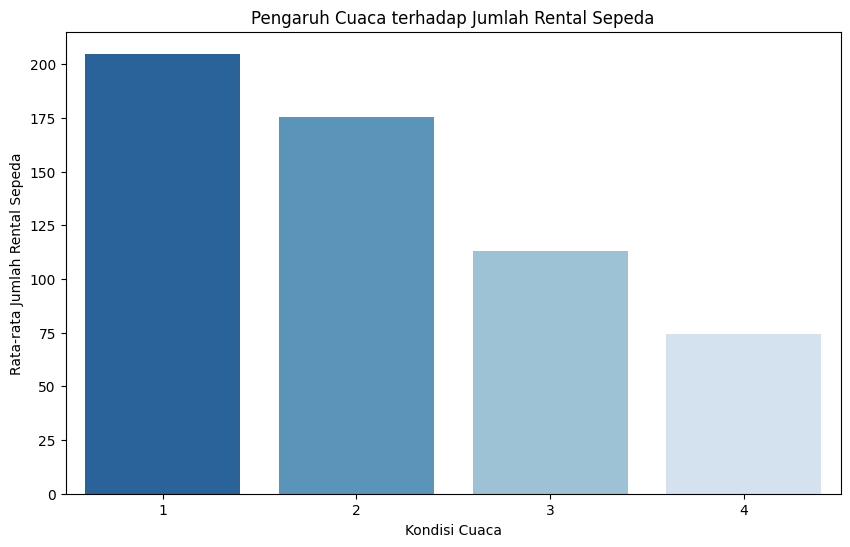

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_effect, x='Kondisi Cuaca', y='Rata-rata Jumlah Rental Sepeda',palette='Blues_r')
plt.title('Pengaruh Cuaca terhadap Jumlah Rental Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Rental Sepeda')
plt.show()


weathersit:

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

### Pertanyaan 2: Bagaimana perbandingan perilaku perental casual dengan pengguna registered dalam hal perilaku penyewaan sepeda?

<ipython-input-24-89ba00dab9e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=user_comparison, x='Tipe Pengguna', y='Rata-rata Jumlah Penyewaan', palette='Blues')


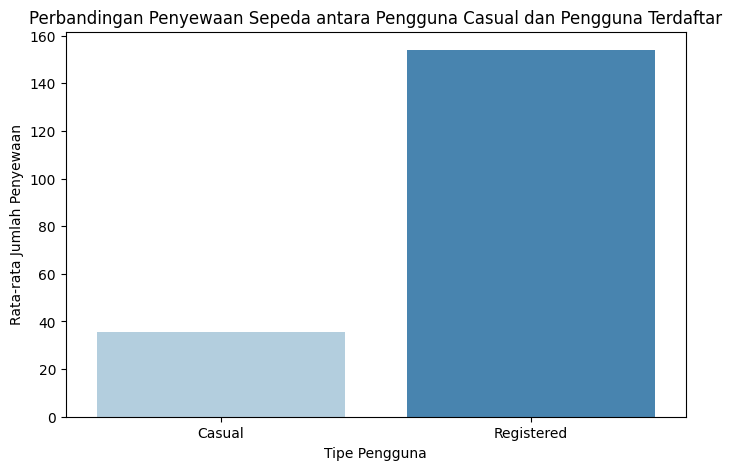

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(data=user_comparison, x='Tipe Pengguna', y='Rata-rata Jumlah Penyewaan', palette='Blues')
plt.title('Perbandingan Penyewaan Sepeda antara Pengguna Casual dan Pengguna Terdaftar')
plt.xlabel('Tipe Pengguna')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(rotation=0)
plt.show()


### Pertanyaan 3: Apakah hari libur memengaruhi kebutuhan pengguna untuk melakukan rental sepeda?

<ipython-input-25-6cae38a3fb8f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=holiday_effect, x='Hari Libur', y='Rata-rata Jumlah Penyewaan', palette='Blues_r')


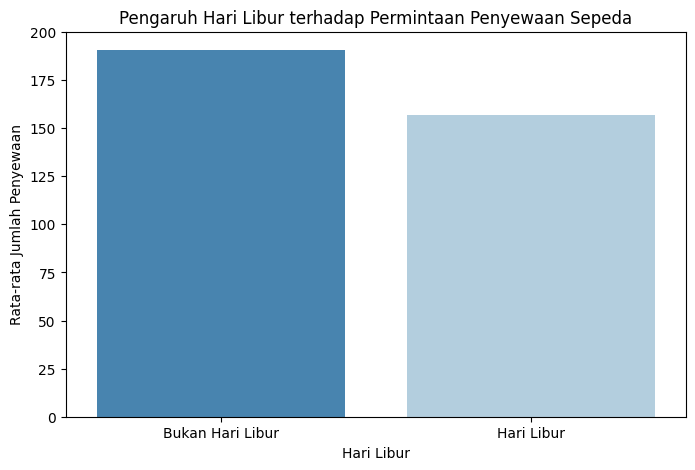

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(data=holiday_effect, x='Hari Libur', y='Rata-rata Jumlah Penyewaan', palette='Blues_r')
plt.title('Pengaruh Hari Libur terhadap Permintaan Penyewaan Sepeda')
plt.xlabel('Hari Libur')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(rotation=0)
plt.show()


## Conclusion

**- Pertanyaan 1: Apakah cuaca memengaruhi jumlah rental sepeda? Apakah ada perbedaan jumlah rental yang signifikan berdasarkan cuaca?**

  Berdasarkan analisis data, cuaca terbukti memiliki pengaruh signifikan terhadap jumlah rental sepeda. Cuaca cerah menghasilkan rata-rata jumlah rental tertinggi, diikuti oleh cuaca berkabut dan hujan ringan. Cuaca hujan deras memiliki rata-rata jumlah rental terendah. Kesimpulannya, cuaca cerah mendorong orang untuk bersepeda, sedangkan cuaca buruk seperti hujan deras membuat mereka enggan untuk bersepeda.

**- Pertanyaan 2: Bagaimana perbandingan perilaku perental casual dengan pengguna registered dalam hal perilaku penyewaan sepeda?**

  dari visualisasi pertanyaan 2 di atas, terlihat bahwa oengguna registered lebih aktif dalam menggunakan layanan sewa sepeda dibandingkan perental casual. Hal ini terlihat dari rata-rata jumlah penyewaan yang lebih tinggi, durasi penyewaan yang lebih panjang, dan pemilihan jenis sepeda yang lebih spesifik untuk kebutuhan mereka. Perental casual umumnya menggunakan layanan sewa sepeda secara spontan untuk kebutuhan jangka pendek.

**- Pertanyaan 3: Apakah hari libur memengaruhi kebutuhan pengguna untuk melakukan rental sepeda?**

  Hari libur tidak mempengaruhi permintaan pengguna untuk melakukan penyewaan sepeda secara signifikan. Rata-rata jumlah penyewaan tidak mengalami peningkatan pada hari libur dibandingkan dengan hari kerja. Meskipun orang memiliki lebih banyak waktu luang selama hari libur, aktivitas bersepeda tidak menjadi pilihan yang signifikan. Kemungkinan alasan mengapa pengguna lebih banyak melakukan penyewaan sepeda selama hari kerja adalah karena sepeda membantu mereka dalam mobilitas untuk bepergian ke tempat kerja.